In [1]:
import torch.nn as nn
import torch

linear_model = nn.Linear(1, 1) #建立一個 nn.Linear 物件，參數分別代表輸入特徵數量及輸出特徵數量(bias參數並未列出，預設為 True)
linear_model(torch.ones(1)) #將物件當成函式來呼叫

tensor([-0.0489], grad_fn=<AddBackward0>)

In [2]:
linear_model.weight #輸出當前的權重值

Parameter containing:
tensor([[0.3129]], requires_grad=True)

In [3]:
linear_model.bias #輸出當前的偏值

Parameter containing:
tensor([-0.3617], requires_grad=True)

In [4]:
x = torch.ones(10, 1)
linear_model(x)

tensor([[-0.0489],
        [-0.0489],
        [-0.0489],
        [-0.0489],
        [-0.0489],
        [-0.0489],
        [-0.0489],
        [-0.0489],
        [-0.0489],
        [-0.0489]], grad_fn=<AddmmBackward>)

In [5]:
t_c = [ 0.5, 14.0, 15.0, 28.0, 11.0, 8.0,   3.0, -4.0,  6.0, 13.0, 21.0] #攝氏溫度
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4] #溫度計上對應到的的讀數

t_c = torch.tensor(t_c).unsqueeze(1) #將資料集打包成張量
t_u = torch.tensor(t_u).unsqueeze(1) #在第 1 軸的位置增加一軸(維度固定為 1)
t_u.shape

torch.Size([11, 1])

In [7]:
linear_model = nn.Linear(1, 1) #利用 nn 模組替換第五章的線型模型
optimizer = torch.optim.SGD(linear_model.parameters(), #利用 parameters() 取代之前的 params
                            lr=1e-2 #學習率
                           )

In [8]:
linear_model.parameters()

<generator object Module.parameters at 0x000002956552D4C0>

In [10]:
list(linear_model.parameters()) #輸出參數串列中的元素

[Parameter containing:
 tensor([[0.3223]], requires_grad=True),
 Parameter containing:
 tensor([0.7633], requires_grad=True)]

In [12]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train) #將訓練資料輸入模型
        loss_train = loss_fn(t_p_train, t_c_train) #計算訓練損失
        t_p_val = model(t_u_val) #將驗證資料輸入模型
        loss_val = loss_fn(t_p_val, t_c_val) #計算驗證損失
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training Loss {loss_train.item():.4f},"
                  f" Validation Loss {loss_val.item():.4f}")

In [13]:
#拆分訓練集和驗證集
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)
shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
train_indices, val_indices

(tensor([ 7,  9,  0,  5,  4,  8,  2,  1, 10]), tensor([6, 3]))

In [14]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [16]:
linear_model = nn.Linear(1, 1)
optimizer = torch.optim.SGD(linear_model.parameters(), lr=1e-2) #定義優化器
training_loop(n_epochs = 3000, #進行 3000 次訓練
              optimizer = optimizer,
              model = linear_model,
              loss_fn = nn.MSELoss(), #此處不再使用手寫的損失函式
              t_u_train = t_un_train,
              t_u_val = t_un_val,
              t_c_train = t_c_train,
              t_c_val = t_c_val
             )
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training Loss 230.1979, Validation Loss 569.4558
Epoch 1000, Training Loss 4.3140, Validation Loss 10.0588
Epoch 2000, Training Loss 2.8613, Validation Loss 5.1895
Epoch 3000, Training Loss 2.7435, Validation Loss 4.7351
Parameter containing:
tensor([[5.2471]], requires_grad=True)
Parameter containing:
tensor([-17.0548], requires_grad=True)


In [18]:
seq_model = nn.Sequential(nn.Linear(1,13), #指定模組中要有 13 個神經元
                          nn.Tanh(),
                          nn.Linear(13,1) #此層的第 0 軸 必須和上一層的第一軸相同，皆為 13
                         )
seq_model

#Sequential(
#  (0): Linear(in_features=1, out_features=13, bias=True) #第 1 線性模型
#  (1): Tanh() #tanh 激活函數
#  (2): Linear(in_features=13, out_features=1, bias=True) #第 2 線性模型
#)

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [20]:
[param.shape for param in seq_model.parameters()]

#[torch.Size([13, 1]),  #第 1 線性模組的權重 shape
#torch.Size([13]),      #第 1 線性模組的偏值 shape
#torch.Size([1, 13]),   #第 2 線性模組的權重 shape
#torch.Size([1])]       #第 2 線性模組的偏值 shape

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [22]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [23]:
from collections import OrderedDict #匯入相關模組

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 13)), #將第 1 個模組命名為 hidden_linear
    ('hidden_activation', nn.Tanh()),    #將第 2 個模組命名為 hidden_activation
    ('output_linear', nn.Linear(13, 1))  #將第 3 個模組命名為 output_linear
]))
seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=13, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=13, out_features=1, bias=True)
)

In [24]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([13, 1])
hidden_linear.bias torch.Size([13])
output_linear.weight torch.Size([1, 13])
output_linear.bias torch.Size([1])


In [25]:
optimizer = torch.optim.SGD(seq_model.parameters(), lr=1e-3) #這裡為了讓結果更穩定，稍微將學習率調低一點
training_loop(n_epochs = 5000,
              optimizer = optimizer,
              model = seq_model,
              loss_fn = nn.MSELoss(),
              t_u_train = t_un_train,
              t_u_val = t_un_val,
              t_c_train = t_c_train,
              t_c_val = t_c_val
             )

print('output', seq_model(t_un_val)) #將驗證集輸入模型並列印其輸出
print('answer', t_c_val) #列印出驗證集的真實答案
print('hidden', seq_model.hidden_linear.weight.grad) #列印隱藏層中所有 weight 參數的梯度

Epoch 1, Training Loss 131.7805, Validation Loss 380.6168
Epoch 1000, Training Loss 3.5680, Validation Loss 35.3143
Epoch 2000, Training Loss 2.4525, Validation Loss 21.2046
Epoch 3000, Training Loss 1.9692, Validation Loss 15.0961
Epoch 4000, Training Loss 1.7409, Validation Loss 11.7712
Epoch 5000, Training Loss 1.6447, Validation Loss 9.8582
output tensor([[-0.2210],
        [24.9448]], grad_fn=<AddmmBackward>)
answer tensor([[ 3.],
        [28.]])
hidden tensor([[-0.0171],
        [ 0.0122],
        [-0.0087],
        [ 0.0109],
        [-0.0450],
        [-0.0138],
        [ 0.0269],
        [ 0.0050],
        [ 0.0518],
        [ 0.0172],
        [-0.0184],
        [ 0.0181],
        [-0.0113]])


d:\anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:3: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  This is separate from the ipykernel package so we can avoid doing imports until


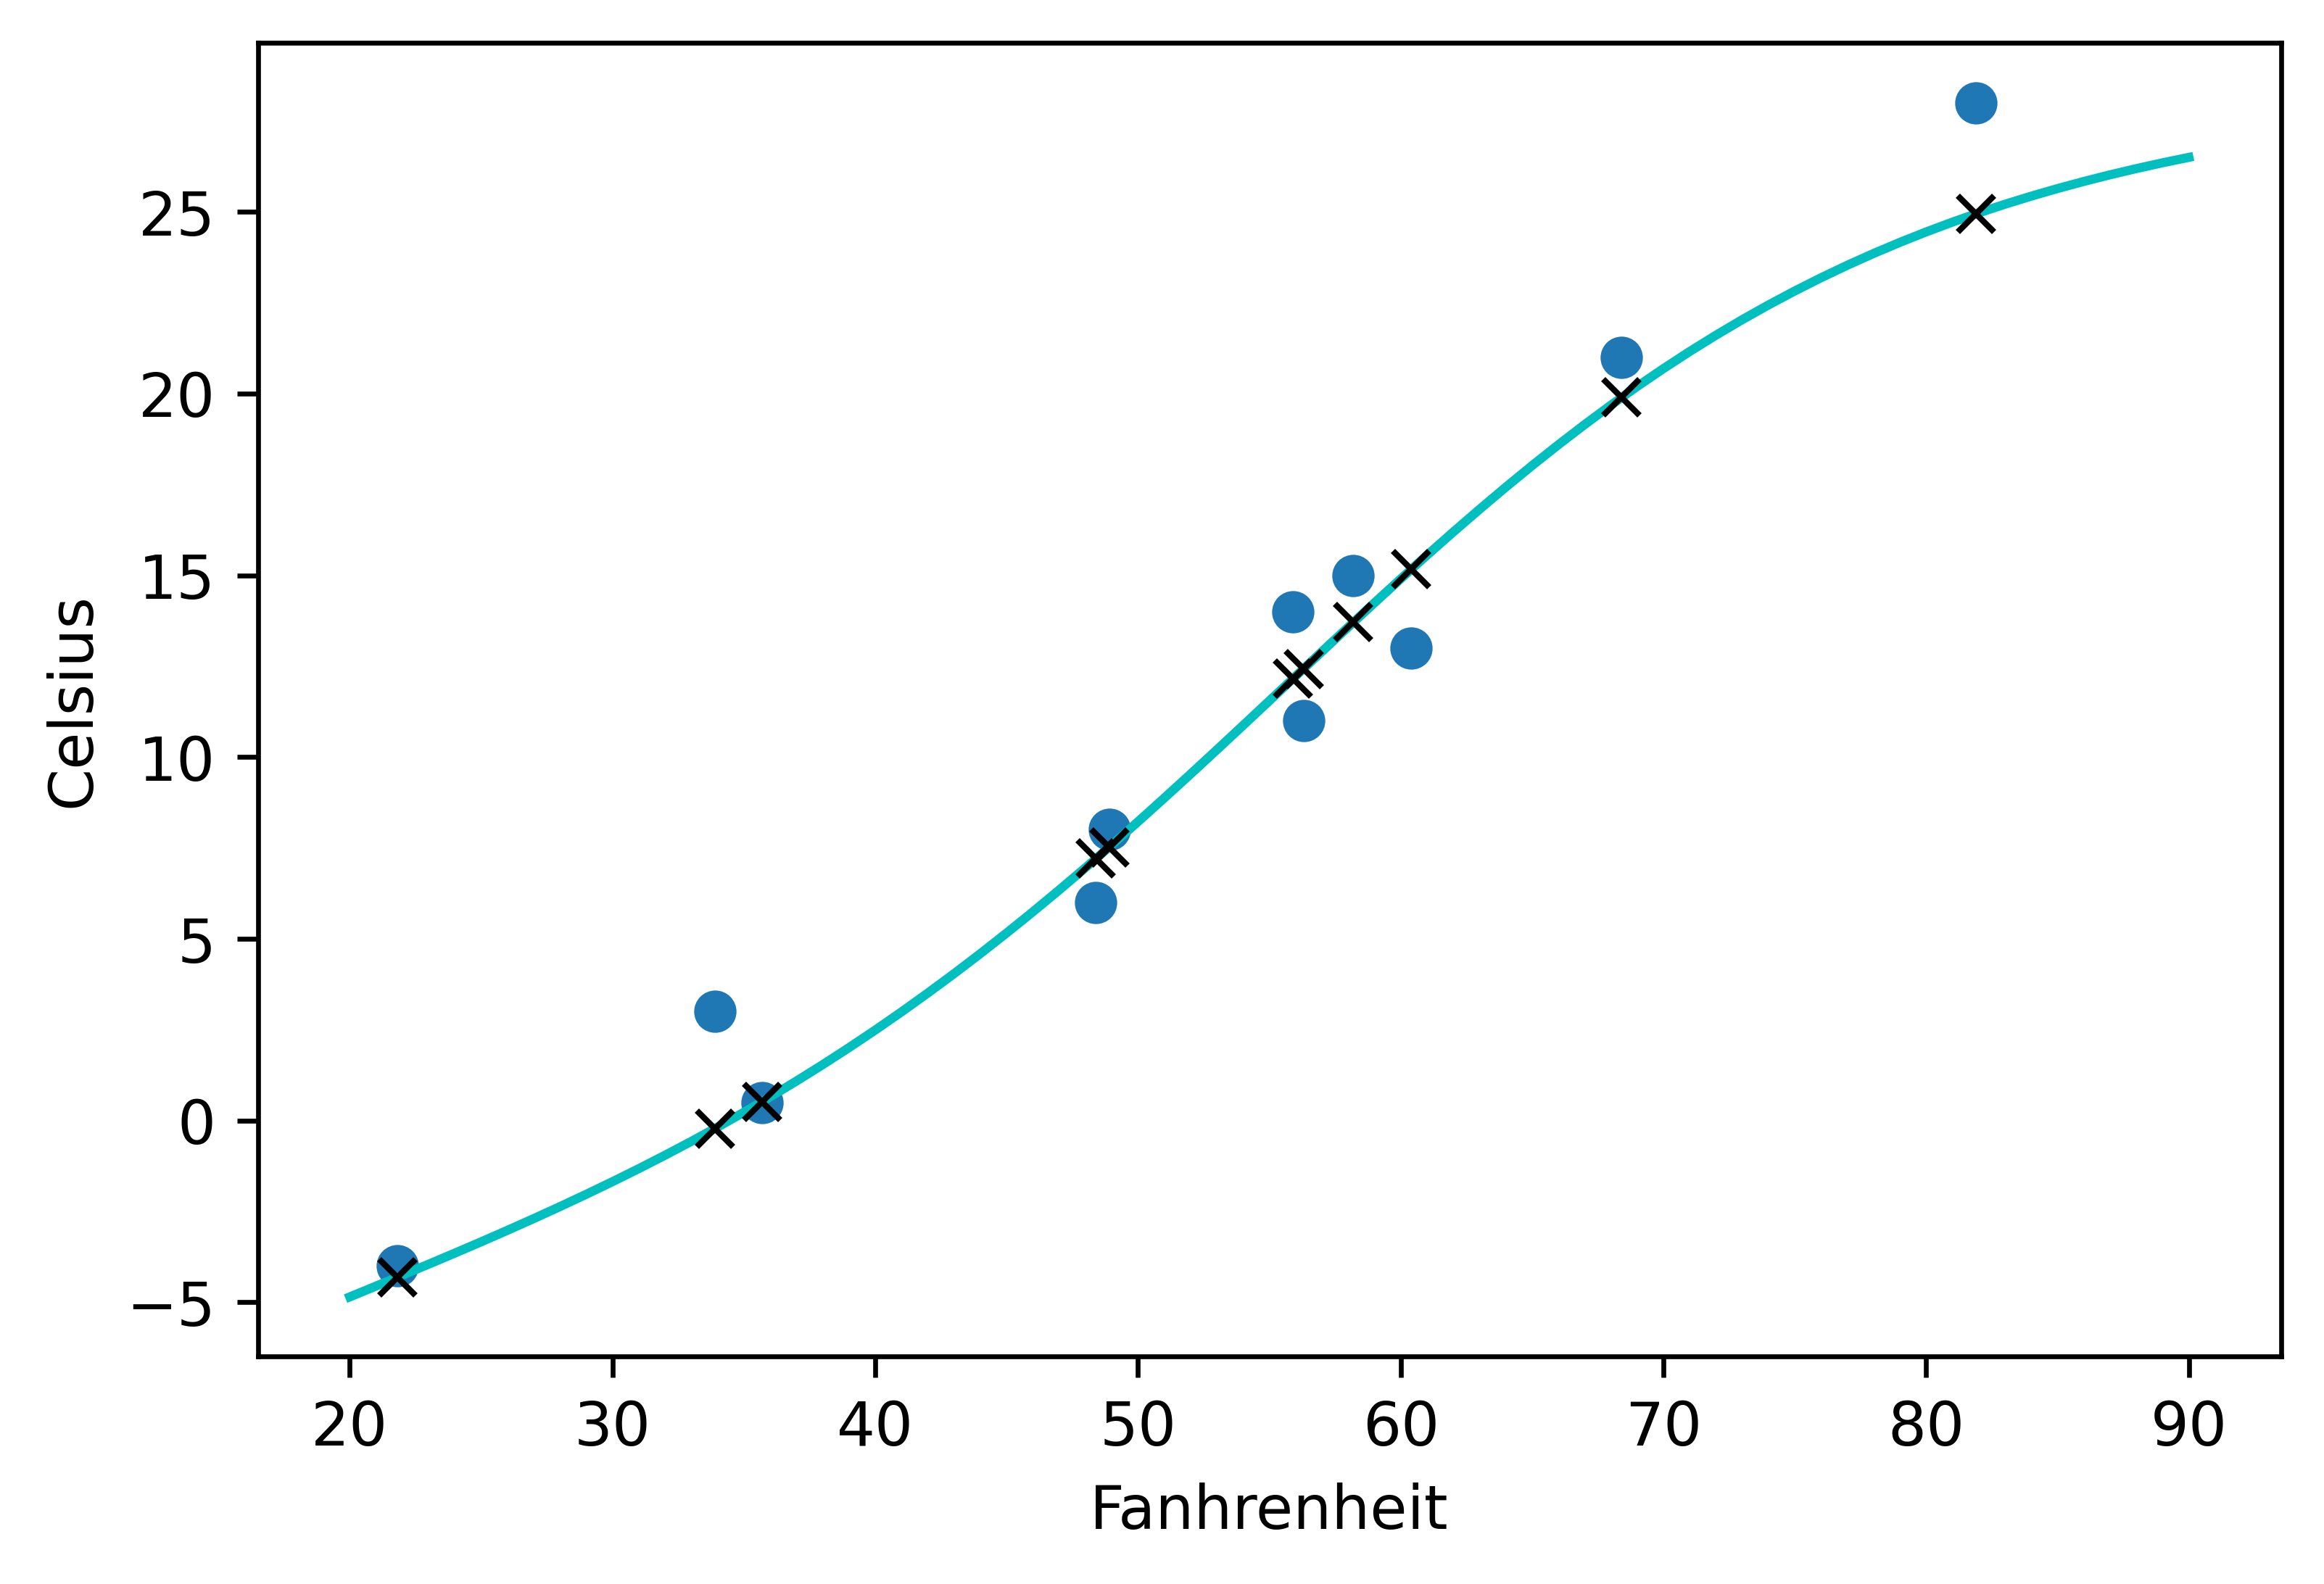

In [27]:
from matplotlib import pyplot as plt

t_range = torch.range(20., 90.).unsqueeze(1)
fig = plt.figure(dpi=600)
plt.xlabel("Fanhrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o') #描繪真實的資料點
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-') #描繪出曲線
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx') #描繪預測的資料點